In [88]:
import seaborn as sns
import pandas as pd
import numpy as np

In [89]:
train = pd.read_csv('train.csv')

In [90]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
train.shape

(1460, 81)

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Let's look how the target columnn SalePrice looks like

<Axes: xlabel='SalePrice'>

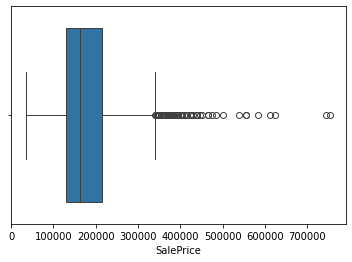

In [93]:
import seaborn as sns
sns.boxplot(data = train, x = 'SalePrice')

Median is about 150k. There are siginificant outliers

Let's look at the distribution of SalePrice

<Axes: xlabel='SalePrice', ylabel='Count'>

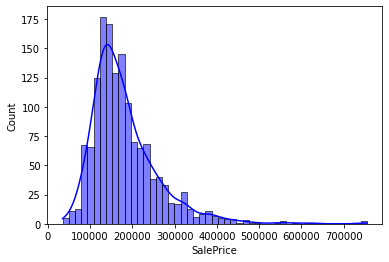

In [94]:
sns.histplot(train['SalePrice'],kde=True,color='b')

In [95]:
q1=train['SalePrice'].quantile(0.25)
q3=train['SalePrice'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)

In [96]:
train[(train['SalePrice']<lower_limit) | (train['SalePrice']>upper_limit)].shape[0]

61

There are 61 outliers by target column

Train data with outliers will be brought to iqr boundaries 

In [97]:
train['SalePrice']=np.where(train['SalePrice'] > upper_limit, upper_limit,
    np.where(
        train['SalePrice']<lower_limit,
        lower_limit,
        train['SalePrice']
    )
)

<Axes: xlabel='SalePrice', ylabel='Count'>

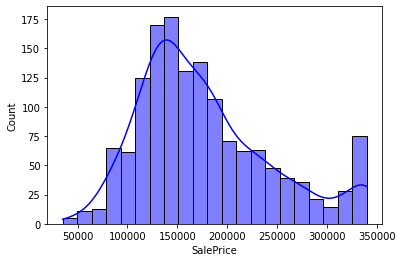

In [98]:
sns.histplot(train['SalePrice'],kde=True,color='b')

<Axes: xlabel='SalePrice'>

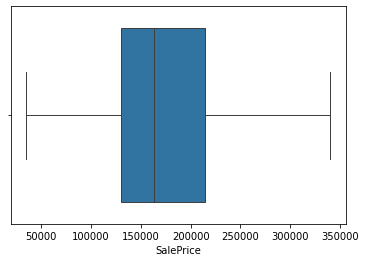

In [99]:
sns.boxplot(data = train, x = 'SalePrice')

Lets try to leave only numeric columns

In [100]:
train = train.select_dtypes(include = ['float64', 'int64'])

In [101]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000.0


In [102]:
corr=train.corr().iloc[:,-1:].sort_values(by="SalePrice",ascending=False).reset_index()
corr_high=corr[corr['SalePrice']>0.3]
corr_high

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.816856
2,GrLivArea,0.699980
3,GarageCars,0.672293
4,GarageArea,0.650429
5,TotalBsmtSF,0.608939
6,1stFlrSF,0.598436
7,FullBath,0.583994
8,YearBuilt,0.568918
9,YearRemodAdd,0.552061


Leave only columns with correlation with targer greater than 0.3

In [103]:
columns_list = corr_high['index'].tolist()
columns_list 

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotFrontage',
 'OpenPorchSF',
 'WoodDeckSF',
 '2ndFlrSF']

In [104]:
new_train=train[columns_list ]
new_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,BsmtFinSF1,LotFrontage,OpenPorchSF,WoodDeckSF,2ndFlrSF
0,208500.0,7,1710,2,548,856,856,2,2003,2003,8,2003.0,0,196.0,706,65.0,61,0,854
1,181500.0,6,1262,2,460,1262,1262,2,1976,1976,6,1976.0,1,0.0,978,80.0,0,298,0
2,223500.0,7,1786,2,608,920,920,2,2001,2002,6,2001.0,1,162.0,486,68.0,42,0,866
3,140000.0,7,1717,3,642,756,961,1,1915,1970,7,1998.0,1,0.0,216,60.0,35,0,756
4,250000.0,8,2198,3,836,1145,1145,2,2000,2000,9,2000.0,1,350.0,655,84.0,84,192,1053


Lets check for misses before training

In [105]:
new_train.isnull().sum()

SalePrice         0
OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
YearBuilt         0
YearRemodAdd      0
TotRmsAbvGrd      0
GarageYrBlt      81
Fireplaces        0
MasVnrArea        8
BsmtFinSF1        0
LotFrontage     259
OpenPorchSF       0
WoodDeckSF        0
2ndFlrSF          0
dtype: int64

In [110]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5,weights='distance')
impute_data=knn.fit_transform(new_train)
new_train=pd.DataFrame(impute_data,columns=new_train.columns)
new_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,BsmtFinSF1,LotFrontage,OpenPorchSF,WoodDeckSF,2ndFlrSF
0,208500.0,7.0,1710.0,2.0,548.0,856.0,856.0,2.0,2003.0,2003.0,8.0,2003.0,0.0,196.0,706.0,65.0,61.0,0.0,854.0
1,181500.0,6.0,1262.0,2.0,460.0,1262.0,1262.0,2.0,1976.0,1976.0,6.0,1976.0,1.0,0.0,978.0,80.0,0.0,298.0,0.0
2,223500.0,7.0,1786.0,2.0,608.0,920.0,920.0,2.0,2001.0,2002.0,6.0,2001.0,1.0,162.0,486.0,68.0,42.0,0.0,866.0
3,140000.0,7.0,1717.0,3.0,642.0,756.0,961.0,1.0,1915.0,1970.0,7.0,1998.0,1.0,0.0,216.0,60.0,35.0,0.0,756.0
4,250000.0,8.0,2198.0,3.0,836.0,1145.0,1145.0,2.0,2000.0,2000.0,9.0,2000.0,1.0,350.0,655.0,84.0,84.0,192.0,1053.0


In [111]:
new_train.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
YearBuilt       0
YearRemodAdd    0
TotRmsAbvGrd    0
GarageYrBlt     0
Fireplaces      0
MasVnrArea      0
BsmtFinSF1      0
LotFrontage     0
OpenPorchSF     0
WoodDeckSF      0
2ndFlrSF        0
dtype: int64

In [112]:
features=new_train.drop(columns=['SalePrice'])
target=new_train['SalePrice']

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [115]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [116]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
pre=lr.predict(xtest)
print("R2_Score ",r2_score(ytest,pre))
print("mean_squared_error",mean_squared_error(ytest, pre))
print("mean_absolute_error", mean_absolute_error(ytest, pre))

R2_Score  0.8540277967289359
mean_squared_error 649585767.0350684
mean_absolute_error 20099.980083389655
